# Package import

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import random
import timeit
import sklearn
import sklearn.model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import string
import os
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.wrappers.scikit_learn import KerasClassifier

random.seed(9001) # For Reproducibility of Results
%matplotlib inline

pd.set_option('display.max_rows', 300)

# Data Load

In [25]:
#NOMIS - CENSUS DATA - DIMENSIONS
population = pd.read_csv('postcodeSector/populationCount.csv', skiprows=8) # 8039*8
ethnicMinority = pd.read_csv('postcodeSector/Ethnic.csv', skiprows=8)  # 8039*96
ageStructure = pd.read_csv('postcodeSector/ageStructure.csv', skiprows=8) #8039*20
relationalSituation = pd.read_csv('postcodeSector/relational.csv', skiprows=8) #8039*8
livingArrangements = pd.read_csv('postcodeSector/livingArrangements.csv', skiprows=8) #8039*9
householdComposition = pd.read_csv('postcodeSector/householdComposition.csv', skiprows=8) #8039*23
notInEmploymentDependencies = pd.read_csv('postcodeSector/notInEmploymentDependencies.csv', skiprows=8) #8039*10
loneParentDependencies = pd.read_csv('postcodeSector/loneParentDependencies.csv', skiprows=8)#8039*13
ethnicGroup = pd.read_csv('postcodeSector/ethnicGroup.csv', skiprows=8) #8039*25
industry = pd.read_csv('postcodeSector/industry.csv', skiprows=8)#8039*26
tenure = pd.read_csv('postcodeSector/tenure.csv', skiprows=8) #8039*8
hoursWorked = pd.read_csv('postcodeSector/hoursWorked.csv', skiprows=8) #8039*6
dwelling = pd.read_csv('postcodeSector/dwelling.csv', skiprows=8) #8039*5
englishProf = pd.read_csv('postcodeSector/englishProf.csv', skiprows=8) #8039*7
centralHeating = pd.read_csv('postcodeSector/centralHeating.csv', skiprows=8) #8039*9
passportHeld = pd.read_csv('postcodeSector/passportHeld.csv', skiprows=7) #8039*73
birthCountry = pd.read_csv('postcodeSector/birthCountry.csv', skiprows=8) #8039*9
religion = pd.read_csv('postcodeSector/religion.csv', skiprows=8) #8063*12
generalHealth = pd.read_csv('postcodeSector/generalHealth.csv', skiprows=8) #8039*7
yearLastWorked = pd.read_csv('postcodeSector/yearLastWorked.csv', skiprows=8) #8039*13
householdSize = pd.read_csv('postcodeSector/householdSize.csv', skiprows=8) #8039*10
carOrVanAvailability = pd.read_csv('postcodeSector/carOrVanAvailability.csv', skiprows=8) #8039*7
distanceTravelledtoWork = pd.read_csv('postcodeSector/distanceTravelledtoWork.csv', skiprows=8) #8039*14
methodofTraveltoWork = pd.read_csv('postcodeSector/methodofTraveltoWork.csv', skiprows=8) #8039*14
ageofArrival = pd.read_csv('postcodeSector/ageofArrival.csv', skiprows=8) #8039*19
lengthofResidence = pd.read_csv('postcodeSector/lengthofResidence.csv', skiprows=8) #8039*7
occupationType = pd.read_csv('postcodeSector/occupation.csv', skiprows=8) #8039*11
mainLanguage = pd.read_csv('postcodeSector/mainLanguage.csv', skiprows=8) #8039*105
bedrooms = pd.read_csv('postcodeSector/bedrooms.csv', skiprows=8) #8039*8
longTermDisability = pd.read_csv('postcodeSector/longTermDisability.csv', skiprows=8) #8039*5
economicActivity = pd.read_csv('postcodeSector/economicActivity.csv', skiprows=8) #8039*17
positionInCommunalEstablishment = pd.read_csv('postcodeSector/positionInCommunalEstablishment.csv', skiprows=8) #8039*5
accomType = pd.read_csv('postcodeSector/accomType.csv', skiprows=8) #8039*13
secondAddress = pd.read_csv('postcodeSector/secondAddress.csv', skiprows=8) #8039*6
formerIndustry = pd.read_csv('postcodeSector/formerIndustry.csv', skiprows=8) #8039*11
formerOccupation = pd.read_csv('postcodeSector/formerOccupation.csv', skiprows=8) #8039*12


religion = religion.drop(religion.index[-24:]) # line added due to notes at bottom of CSV

qualification = pd.read_csv('postcodeSector/qualification.csv', skiprows=8) #8039*14   # AS A PROPORTION ONLY 


# Set up classification problem

In [26]:
qualification.drop(qualification.columns[[1,2,3,4,5,7,8,9,10,11,12]], axis=1, inplace=True)
qualification = qualification.rename(index=str, columns={"Highest level of qualification: Level 4 qualifications and above": "target"})

In [27]:
qualification.quantile(0.7) # Check to see where 70 percent quartile is to setup class imbalance

target    33.2
Name: 0.7, dtype: float64

In [28]:
# Assign a 1 or a zero as a output depending on whether proportion of people have, or don't have a higher education degree
qualification['classification'] = np.where(qualification['target']>=33.2, 1, 0) 

#Check
values = qualification.groupby('classification').count()
values['perc']= values['target']/values['target'].sum()
values

,postcode sector,target,perc
classification,,,
0,5620,5620,0.69944
1,2415,2415,0.30056


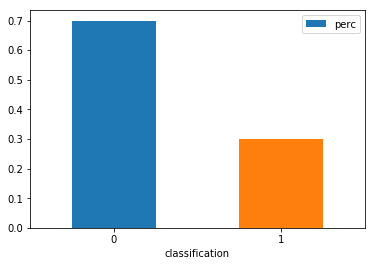

In [29]:
ax = values.plot.bar(y = 'perc',rot=0, )

# Combine datasets

In [30]:
###Merge different datasets
newDF = [population, ethnicMinority, ageStructure, relationalSituation, livingArrangements, householdComposition,notInEmploymentDependencies,loneParentDependencies,ethnicGroup,industry,tenure, hoursWorked,dwelling,englishProf,centralHeating,passportHeld,birthCountry,religion,generalHealth,yearLastWorked,householdSize,carOrVanAvailability,distanceTravelledtoWork,methodofTraveltoWork,ageofArrival,lengthofResidence,occupationType,mainLanguage,bedrooms,longTermDisability,economicActivity,positionInCommunalEstablishment,accomType,secondAddress,formerIndustry,formerOccupation,qualification]
newDF2 = pd.concat([i.set_index('postcode sector') for i in newDF],axis=1, join='outer')

In [31]:
#Check for dimensions
newDF2.shape

(8039, 735)

In [32]:
#drop rows without any information
newDF3 = newDF2.dropna()
newDF3.shape

(8035, 735)

In [33]:
#drop duplicate columns arising from merging...
newDF4 = newDF3.T.drop_duplicates().T

In [34]:
#remove spaces from variable names to allow access to columns
newDF4.columns = newDF4.columns.map(lambda x: x.replace(' ', '_'))

# Splitting data into Train, Test and Validation

In [35]:
featuresforTraining = newDF4.drop(['target','classification'], axis=1)

In [36]:
#Define function for splitting data
def validationTrainTestSplit(featuresforTraining, newDF4):#Splits data into 60-20-20 spilt 
    X_train1, X_test, y_train1, y_test = train_test_split(featuresforTraining, newDF4.classification, random_state=0, test_size=.2)
    X_train, X_validation, y_train,y_validation = train_test_split(X_train1, y_train1, random_state=0, test_size=.25)
    
    return X_train, X_test, X_validation, y_train, y_validation,y_test

In [37]:
#Execute function for splitting data
X_train, X_test, X_validation, y_train, y_validation,y_test = validationTrainTestSplit(featuresforTraining,newDF4)

In [38]:
#Check to see if 60-20-20 split correct
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(4821, 704)
(1607, 704)
(1607, 704)


In [39]:
y_train=y_train.astype('int')
y_test = y_test.astype('int')
y_validation = y_validation.astype('int')

# Scaling

In [40]:
#Scale the Data
scaler = StandardScaler()

In [41]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

In [43]:
X_validation.shape

(1607, 704)

# Model

In [44]:
def hyperParameterTuneDeepnet(i,j,k,X_train,y_train,X_test,y_test):
    deepLearn = Sequential()
    deepLearn.add(Dense(i, input_dim=704, activation='relu'))
    deepLearn.add(Dense(j, activation='relu'))
    deepLearn.add(Dense(1, activation='sigmoid'))
    deepLearn.compile(loss='binary_crossentropy', optimizer='adam')
    deepLearn.fit(X_train, y_train, epochs=k, verbose=0)

    y_pred = deepLearn.predict_classes(X_test)
    y_pred = pd.DataFrame(y_pred, dtype='int')
    y_pred = y_pred[0]
    print("  Hiddenlayer1 =" + str(i) + "          Hiddenlayer2 =" + str(j) + "         epochs =" + str(k) )
    
    #print metrics
    print('CONFUSION MATRIX:   ')
    confusion_matrix2 = confusion_matrix(y_test, y_pred)
    print(confusion_matrix2)

    print('CLASSIFICATION REPORT:    ')
    print(classification_report(y_test, y_pred))

    print('ROC CURVE')
    logit_roc_auc = roc_auc_score(y_test, deepLearn.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, deepLearn.predict_proba(X_test))
    plt.figure()
    plt.plot(fpr, tpr, label='Deep Learning (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    return

In [45]:
#HYPER PARAMETER TUNE
hiddenlayer1 = [70,300,500] 
hiddenlayer2 = [70,300,500]
epochs = [1,10,25,50]

  Hiddenlayer1 =70          Hiddenlayer2 =70         epochs =1
CONFUSION MATRIX:   
[[1089   40]
 [ 120  358]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1129
          1       0.90      0.75      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


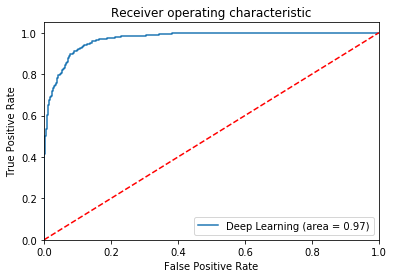

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =70         epochs =10
CONFUSION MATRIX:   
[[1074   55]
 [  33  445]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.95      0.96      1129
          1       0.89      0.93      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


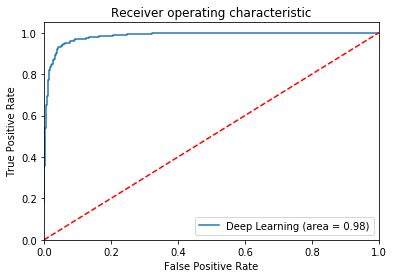

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =70         epochs =25
CONFUSION MATRIX:   
[[1083   46]
 [  40  438]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.96      0.96      1129
          1       0.90      0.92      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


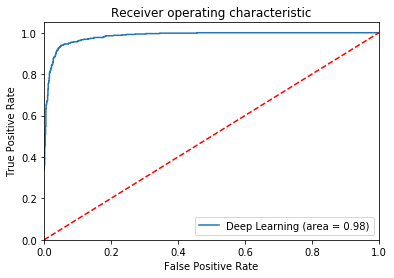

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =70         epochs =50
CONFUSION MATRIX:   
[[1087   42]
 [  40  438]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.96      0.96      1129
          1       0.91      0.92      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


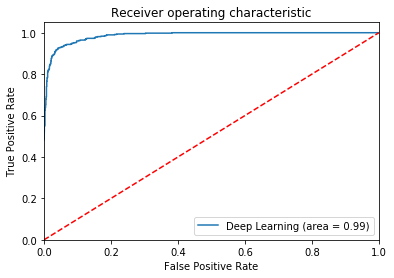

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =300         epochs =1
CONFUSION MATRIX:   
[[974 155]
 [ 30 448]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.86      0.91      1129
          1       0.74      0.94      0.83       478

avg / total       0.90      0.88      0.89      1607

ROC CURVE


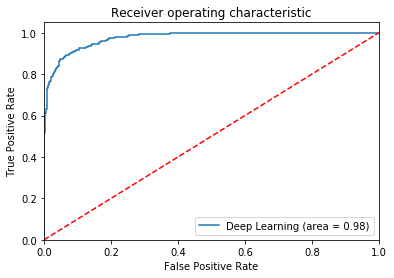

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =300         epochs =10
CONFUSION MATRIX:   
[[975 154]
 [ 24 454]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.86      0.92      1129
          1       0.75      0.95      0.84       478

avg / total       0.91      0.89      0.89      1607

ROC CURVE


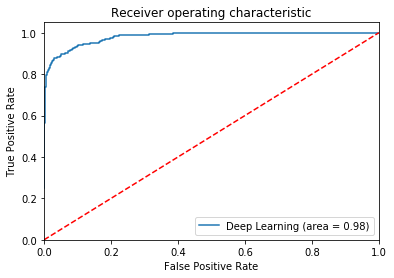

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =300         epochs =25
CONFUSION MATRIX:   
[[1078   51]
 [  39  439]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.95      0.96      1129
          1       0.90      0.92      0.91       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


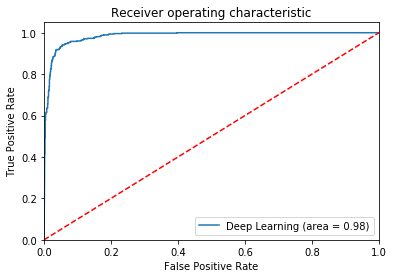

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =300         epochs =50
CONFUSION MATRIX:   
[[1080   49]
 [  41  437]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.96      0.96      1129
          1       0.90      0.91      0.91       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


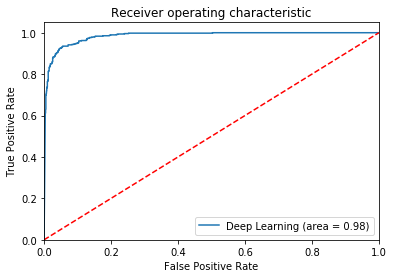

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =500         epochs =1
CONFUSION MATRIX:   
[[1066   63]
 [  51  427]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.94      0.95      1129
          1       0.87      0.89      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


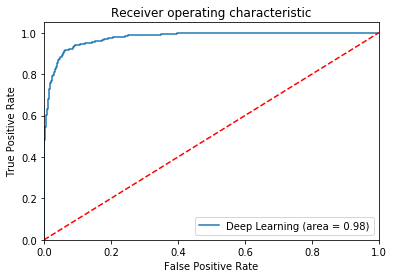

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =500         epochs =10
CONFUSION MATRIX:   
[[1089   40]
 [  57  421]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.96      1129
          1       0.91      0.88      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


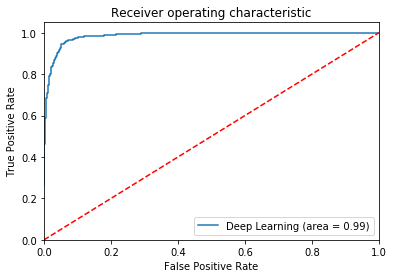

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =500         epochs =25
CONFUSION MATRIX:   
[[1074   55]
 [  36  442]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.95      0.96      1129
          1       0.89      0.92      0.91       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


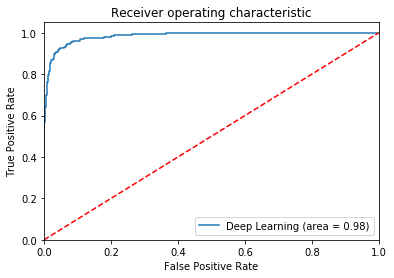

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =70          Hiddenlayer2 =500         epochs =50
CONFUSION MATRIX:   
[[1098   31]
 [  65  413]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.97      0.96      1129
          1       0.93      0.86      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


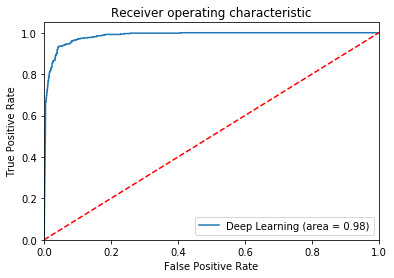

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =70         epochs =1
CONFUSION MATRIX:   
[[1073   56]
 [  75  403]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      1129
          1       0.88      0.84      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


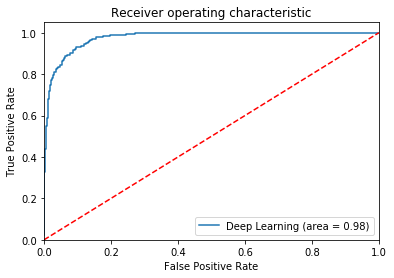

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =70         epochs =10
CONFUSION MATRIX:   
[[1097   32]
 [ 108  370]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.92      0.77      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


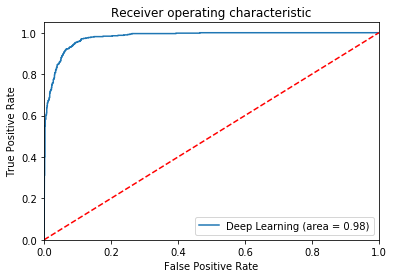

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =70         epochs =25
CONFUSION MATRIX:   
[[1077   52]
 [  38  440]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.95      0.96      1129
          1       0.89      0.92      0.91       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


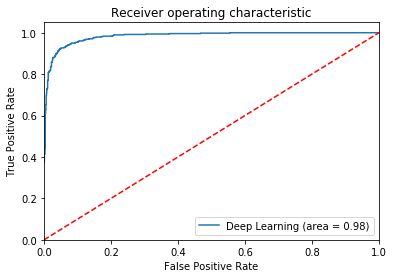

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =70         epochs =50
CONFUSION MATRIX:   
[[1094   35]
 [  60  418]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1129
          1       0.92      0.87      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


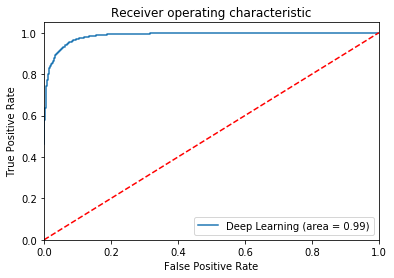

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =300         epochs =1
CONFUSION MATRIX:   
[[1061   68]
 [  67  411]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.94      0.94      1129
          1       0.86      0.86      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


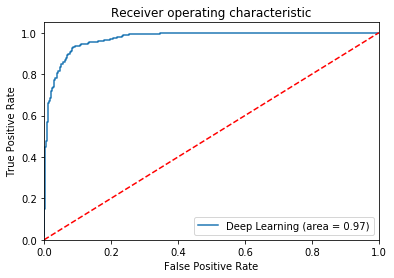

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =300         epochs =10
CONFUSION MATRIX:   
[[1107   22]
 [  60  418]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.98      0.96      1129
          1       0.95      0.87      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


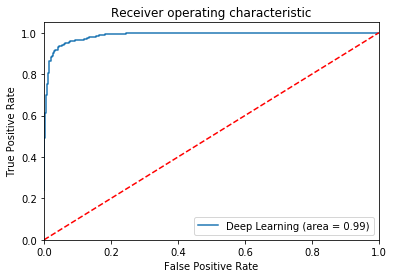

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =300         epochs =25
CONFUSION MATRIX:   
[[1045   84]
 [  26  452]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.93      0.95      1129
          1       0.84      0.95      0.89       478

avg / total       0.94      0.93      0.93      1607

ROC CURVE


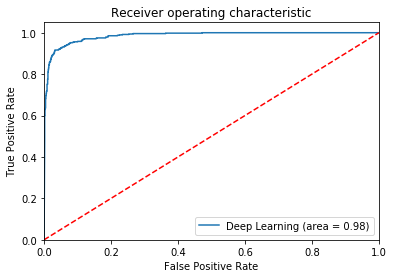

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =300         epochs =50
CONFUSION MATRIX:   
[[1070   59]
 [  37  441]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.95      0.96      1129
          1       0.88      0.92      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


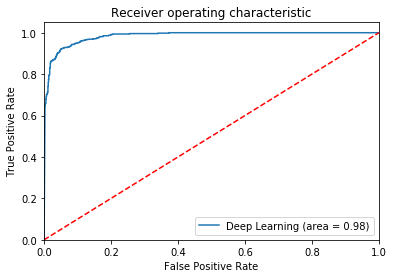

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =500         epochs =1
CONFUSION MATRIX:   
[[1066   63]
 [  69  409]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.94      0.94      1129
          1       0.87      0.86      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


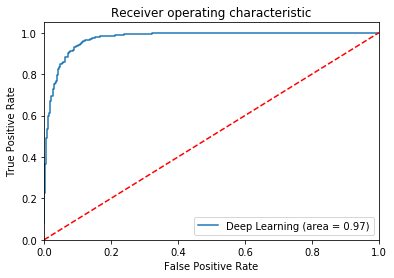

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =500         epochs =10
CONFUSION MATRIX:   
[[1076   53]
 [  29  449]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.95      0.96      1129
          1       0.89      0.94      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


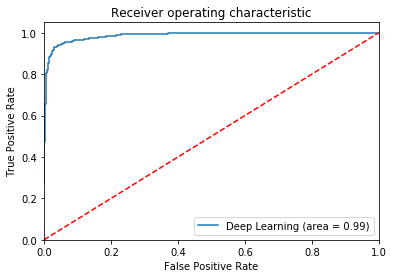

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =500         epochs =25
CONFUSION MATRIX:   
[[1031   98]
 [  28  450]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.91      0.94      1129
          1       0.82      0.94      0.88       478

avg / total       0.93      0.92      0.92      1607

ROC CURVE


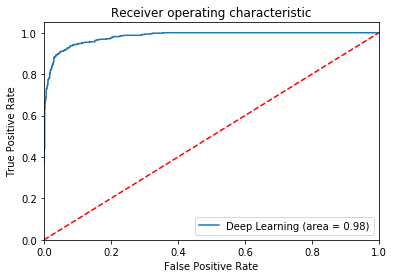

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =300          Hiddenlayer2 =500         epochs =50
CONFUSION MATRIX:   
[[1101   28]
 [  63  415]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.98      0.96      1129
          1       0.94      0.87      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


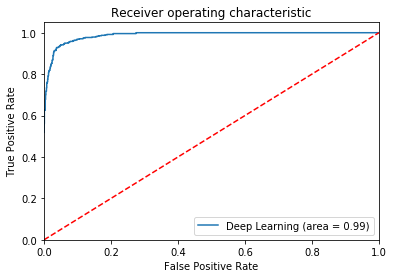

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =70         epochs =1
CONFUSION MATRIX:   
[[1074   55]
 [ 162  316]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      0.95      0.91      1129
          1       0.85      0.66      0.74       478

avg / total       0.86      0.86      0.86      1607

ROC CURVE


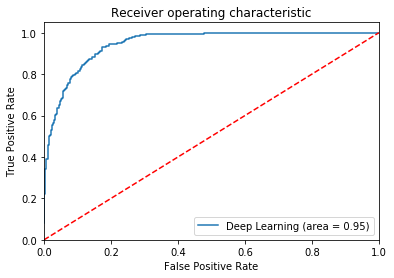

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =70         epochs =10
CONFUSION MATRIX:   
[[1061   68]
 [  33  445]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.94      0.95      1129
          1       0.87      0.93      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


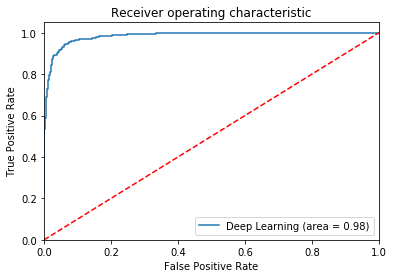

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =70         epochs =25
CONFUSION MATRIX:   
[[1090   39]
 [  53  425]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1129
          1       0.92      0.89      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


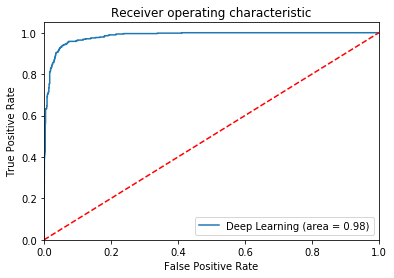

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =70         epochs =50
CONFUSION MATRIX:   
[[1096   33]
 [  44  434]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.97      1129
          1       0.93      0.91      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


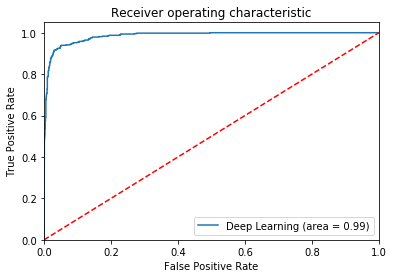

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =300         epochs =1
CONFUSION MATRIX:   
[[1105   24]
 [ 145  333]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.93      0.70      0.80       478

avg / total       0.90      0.89      0.89      1607

ROC CURVE


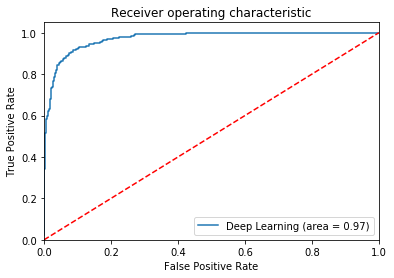

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =300         epochs =10
CONFUSION MATRIX:   
[[1101   28]
 [  62  416]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.98      0.96      1129
          1       0.94      0.87      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


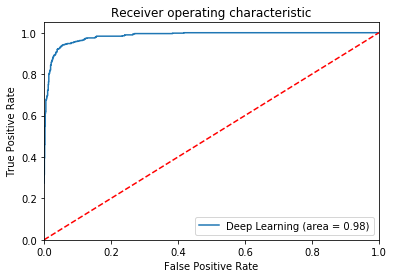

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =300         epochs =25
CONFUSION MATRIX:   
[[1051   78]
 [  30  448]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.93      0.95      1129
          1       0.85      0.94      0.89       478

avg / total       0.94      0.93      0.93      1607

ROC CURVE


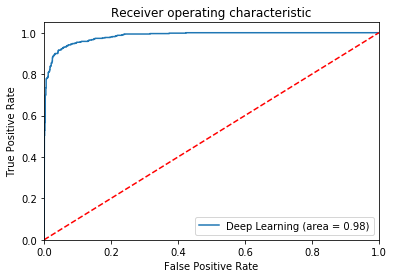

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =300         epochs =50
CONFUSION MATRIX:   
[[1087   42]
 [  40  438]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.96      0.96      1129
          1       0.91      0.92      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


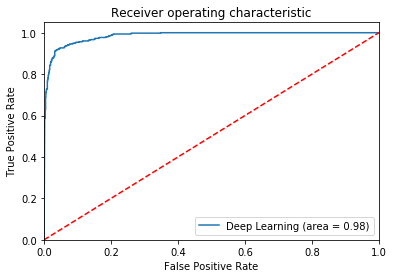

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =500         epochs =1
CONFUSION MATRIX:   
[[1092   37]
 [ 100  378]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.91      0.79      0.85       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


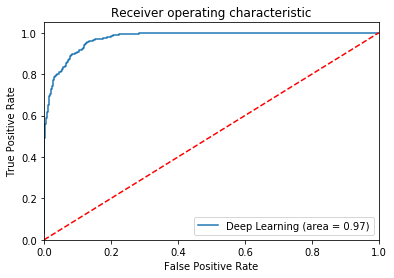

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =500         epochs =10
CONFUSION MATRIX:   
[[1079   50]
 [  33  445]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.96      0.96      1129
          1       0.90      0.93      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


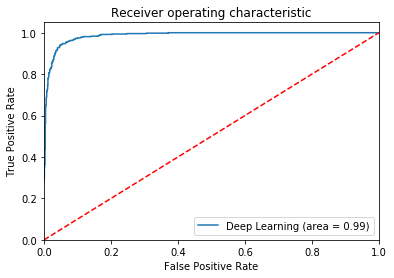

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =500         epochs =25
CONFUSION MATRIX:   
[[1092   37]
 [  41  437]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.97      1129
          1       0.92      0.91      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


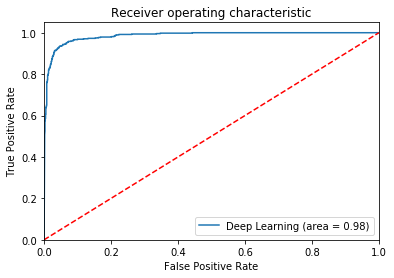

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Hiddenlayer1 =500          Hiddenlayer2 =500         epochs =50
CONFUSION MATRIX:   
[[1101   28]
 [  68  410]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.98      0.96      1129
          1       0.94      0.86      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


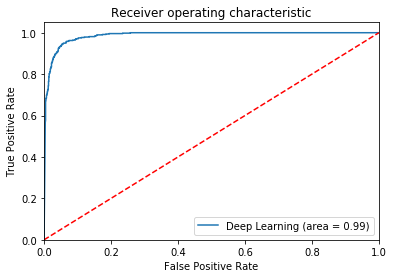

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
Time Elapsed:
753.7574052464645


In [46]:
#Find optimal parameters
start_time = timeit.default_timer()
for i in hiddenlayer1:
    for j in hiddenlayer2:
        for k in epochs:
            hyperParameterTuneDeepnet(i,j,k,X_train,y_train,X_validation,y_validation)
elapsed = timeit.default_timer() - start_time
print("Time Elapsed:")
print(elapsed)            

# OPTIMAL PARAMETERS:

### hiddenlayer1: 500---------hiddenlayer2: 500---------epochs: 25

### COMPUTE TIME: 753.757s

# Test on Unseen Data with optimal hyperparameters

  Hiddenlayer1 =500          Hiddenlayer2 =500         epochs =25
CONFUSION MATRIX:   
[[1034   62]
 [  43  468]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.94      0.95      1096
          1       0.88      0.92      0.90       511

avg / total       0.94      0.93      0.93      1607

ROC CURVE


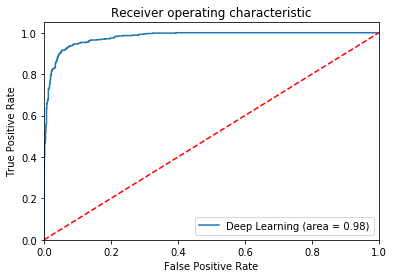

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------


In [47]:
hyperParameterTuneDeepnet(500,500,25,X_train,y_train,X_test,y_test)